In [1]:
# import basic library and read csv files 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import chi2_contingency

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None) 

# Pre-Processing

In [2]:
student_por =  pd.read_csv('./student-por.csv')

In [3]:
student_por.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12


In [4]:
student_por.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [5]:
student_por.duplicated().sum()

0

# EDA and Hypothesis Testing

## Does study time impact final grade? How many hours is considered optimal?

In [6]:
#change numerical values to labels
student_por.studytime.replace(to_replace=[1,2,3,4], value=['< 2 hours','2 to 5 hours', '5 to 10 hours', '> 10 hours'], inplace=True)

Text(0.5, 1.0, 'Number of Students by Study Time')

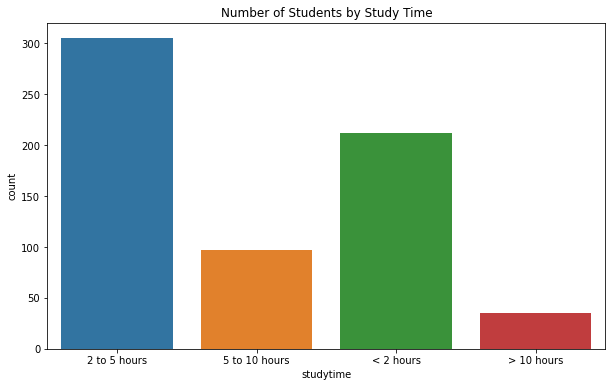

In [7]:
plt.figure(figsize=(10,6))
sns.countplot(x=student_por.studytime,data=student_por)
plt.title("Number of Students by Study Time")

Text(0.5, 1.0, 'Reslut of Final Grade by Study Time')

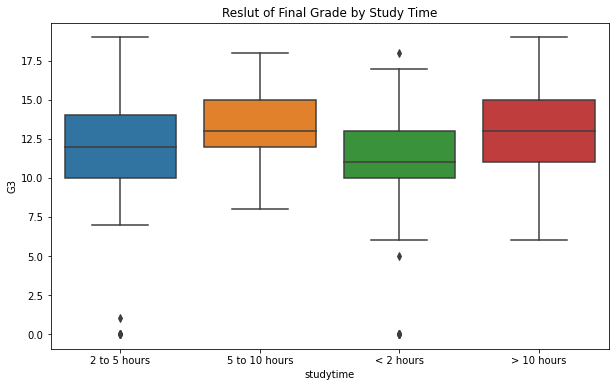

In [8]:
plt.figure(figsize=(10,6))
sns.boxplot(x=student_por.studytime, y='G3', data=student_por)
plt.title("Reslut of Final Grade by Study Time")

In [9]:
#observe mean values of different groups
w =student_por[student_por.studytime=='5 to 10 hours']
x =student_por[student_por.studytime=='> 10 hours']
y =student_por[student_por.studytime=='2 to 5 hours']
z =student_por[student_por.studytime=='< 2 hours']

print(w.G3.mean())
print(x.G3.mean())
print(y.G3.mean())
print(z.G3.mean())

13.22680412371134
13.057142857142857
12.091803278688525
10.84433962264151


In [10]:
#pre-process for testing
studytime = student_por['studytime']
finalgrade = student_por['G3']

table3 = pd.crosstab(studytime,finalgrade)

In [11]:
# Chi-squared test
chi, p, d, e = chi2_contingency(table3)

print('study time vs final grade:')
print("chi_val = %g"% (chi))
print("p_val = %g"% (p))

study time vs final grade:
chi_val = 92.7071
p_val = 0.000114396


- P-value is less than 0.05 so we can reject null hypothesis and conclude there is an association between result of final grade and the amount time you study. Interesting to note that it is not a linear relationship because for students who studied over 10 hours don't seem to score better than students who study 5-10 hours.

## Do parents’ level of education affect students’ students’ performance in school?

In [12]:
medu_high = student_por[student_por["Medu"]==4]
fedu_high = student_por[student_por["Fedu"]==4]
merge_high = pd.concat([medu_high,fedu_high], axis=0)
pedu_high = merge_high.drop_duplicates(subset=["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","famrel","freetime","goout","reason","nursery","internet","G1","G2","G3"])

fedu = student_por[student_por["Fedu"]<4]
pedu = student_por[student_por["Medu"]<4]

We define group 1, pedu_high, as students who have at least one parent with a high level of education and group 2, pedu, as students who have parents, neither of whom has a high level of education.

In [13]:
stats.ttest_ind(pedu["G3"],pedu_high["G3"]) 

Ttest_indResult(statistic=-5.6540852648733635, pvalue=2.3072590336934125e-08)

In [14]:
stats.mannwhitneyu(pedu["G3"],pedu_high["G3"]) 

MannwhitneyuResult(statistic=34144.5, pvalue=1.222427299208916e-10)

The p-value is approximately 0, which is smaller than the significance level of 0.05. Therefore, we reject the null hypothesis that the overall grades of students in the two groups are the same and conclude that the parents’ educational level has an impact on student grades.

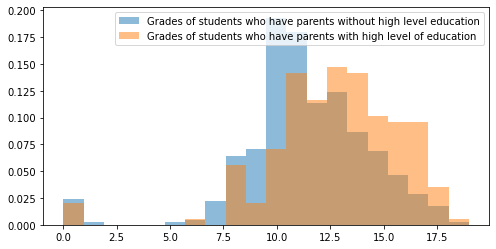

In [15]:
plt.rcParams["figure.figsize"] = (8,4)
plt.hist(pedu["G3"], density=True, bins=20, alpha = 0.5, label = "Grades of students who have parents without high level education")
plt.hist(pedu_high["G3"], density=True, bins=20, alpha=0.5, label = "Grades of students who have parents with high level of education")
plt.legend()

In [16]:
np.mean(pedu_high["G3"])

12.95673076923077

In [17]:
np.mean(pedu["G3"])

11.476793248945148

Text(0.5, 1.0, 'Students whose parents do not have high level education')

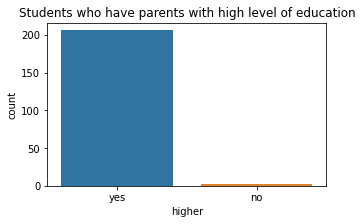

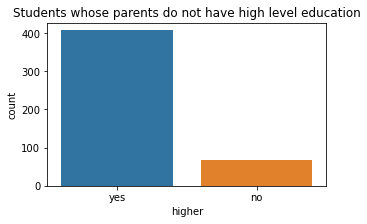

In [18]:
## yes = wants to pursue high level education, no = does not want to pursue high level education

plt.figure(figsize=(5,3))
sns.countplot(x=pedu_high.higher,data=pedu_high)
plt.title("Students who have parents with high level of education")

plt.figure(figsize=(5,3))
sns.countplot(x=pedu.higher,data=pedu)
plt.title("Students whose parents do not have high level education")

## M/L
- What factor leads to academic success? 
- Can we assume an academic success based on given features?

### Conducting linear regression
- Feature as given factors, predict target value as Grade(G1) 
- Since target value is not binomial, our team conducted linear regression
- By using linear regression, Ridge, Lasso models, our team calculated R^2 scores
- Also, we checked which alpha should be optimal, given train error & test error

In [19]:
# Target value 'G1' distribution
student_por['G1'].value_counts()

10    95
11    91
12    82
13    72
14    71
9     65
8     42
15    35
7     33
16    22
17    16
6      9
18     7
5      5
4      2
0      1
19     1
Name: G1, dtype: int64

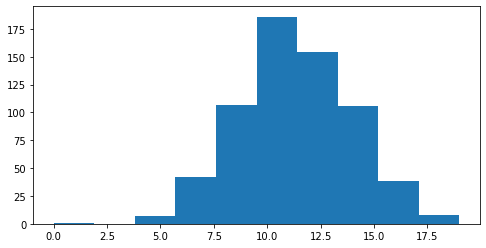

In [20]:
# Target value shows normal distribution
plt.hist(student_por['G1'])
plt.show()

In [21]:
# Checking distribution of each given columns
for column in student_por.columns:
    print('----------')
    print(column)
    print(student_por[column].value_counts(), '\n')


----------
school
GP    423
MS    226
Name: school, dtype: int64 

----------
sex
F    383
M    266
Name: sex, dtype: int64 

----------
age
17    179
16    177
18    140
15    112
19     32
20      6
21      2
22      1
Name: age, dtype: int64 

----------
address
U    452
R    197
Name: address, dtype: int64 

----------
famsize
GT3    457
LE3    192
Name: famsize, dtype: int64 

----------
Pstatus
T    569
A     80
Name: Pstatus, dtype: int64 

----------
Medu
2    186
4    175
1    143
3    139
0      6
Name: Medu, dtype: int64 

----------
Fedu
2    209
1    174
3    131
4    128
0      7
Name: Fedu, dtype: int64 

----------
Mjob
other       258
services    136
at_home     135
teacher      72
health       48
Name: Mjob, dtype: int64 

----------
Fjob
other       367
services    181
at_home      42
teacher      36
health       23
Name: Fjob, dtype: int64 

----------
reason
course        285
home          149
reputation    143
other          72
Name: reason, dtype: int64 

-------

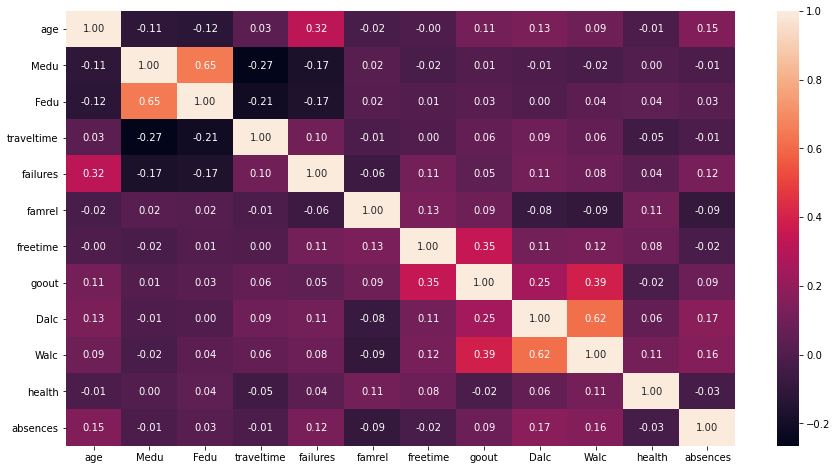

In [22]:
# Analyzing correlation among features and look for correlation
# Facts and interpretation

# 1) Medu & Fedu have correlation of 0.65:
# - Mother's education level has high positive corrlation with Father's education level
# -> Mother and father's education level tends to follow each other  

# 2) Dalc & Walc have correlation of 0.62:
# - Workday alcohol consumption has high positive corrlation with weekend alcohol consumption
# -> Student who consumes alchol on workday also consumes on weekend

# 3) goout & Walc have correlation of 0.39:
# - Going out with friends has high positive corrlation with weekend alcohol consumption
# -> Student who hangs out tends to consume alcohol on weekends 

# 4) freetime & goout have correlation of 0.35:
# - free time after school has high positive corrlation with going out with friends
# -> Students tend to hang out with friends when they have free time after school

# 5) age & failure have correlation of 0.32:
# - age has high positive corrlation with number of past class failures
# -> Class failure makes delays graduation and this makes student more aged  

# 6) Medu & traveltime have correlation of -0.27:
# - Mother's education level has high negative corrlation with home to school travel time
# -> Mother (and father)'s high education level might affected to move closer to school for their kids

# 7) Medu & failures have correlation of -0.17:
# - Mother's education level has high negative corrlation with number of past class failures
# -> Mother (and father)'s high education level might affected students to study and this lead to success in class 


# traveltime vs Medu/Fedu: highly educated mom/dad decides to let their son/daughter live closer to school
import seaborn as sns

plt.figure(figsize=(15,8))
student_por_fea = student_por.drop(['G1', 'G2', 'G3'], axis=1, inplace=False)
sns.heatmap(student_por_fea.corr(), annot=True, fmt='.2f')
plt.xticks(rotation = 0)
plt.show()

In [23]:
# dividing numerical columns / categorical columns
# for categorical columns, conduct one-hot encoding by using get_dummies function 
num_col = student_por.describe().columns
cat_col = student_por.columns.drop(num_col)

student_por_encoded = pd.get_dummies(student_por, columns=cat_col, prefix=cat_col)

In [24]:
len(num_col), len(cat_col)

(15, 18)

In [25]:
# Encoded version of dataset
student_por_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 62 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   age                      649 non-null    int64
 1   Medu                     649 non-null    int64
 2   Fedu                     649 non-null    int64
 3   traveltime               649 non-null    int64
 4   failures                 649 non-null    int64
 5   famrel                   649 non-null    int64
 6   freetime                 649 non-null    int64
 7   goout                    649 non-null    int64
 8   Dalc                     649 non-null    int64
 9   Walc                     649 non-null    int64
 10  health                   649 non-null    int64
 11  absences                 649 non-null    int64
 12  G1                       649 non-null    int64
 13  G2                       649 non-null    int64
 14  G3                       649 non-null    int64
 15  school

In [26]:
# Linear Regression
# train_error: 4.698426657828137, test_error: 5.446832221841965, reg_score: 0.3739893747237155
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

y_target = student_por_encoded['G1']
X_features = student_por_encoded.drop(['G1', 'G2', 'G3'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
train_error = mean_squared_error(y_train, lr_reg.predict(X_train))
test_error = mean_squared_error(y_test, lr_reg.predict(X_test))
reg_score = lr_reg.score(X_train, y_train)

print('train_error: {0:.4f}, test_error: {1:.4f}, reg_score: {2:.4f}'.format(train_error, test_error, reg_score))

train_error: 4.6984, test_error: 5.4471, reg_score: 0.3740


In [27]:
# Ridge Regression
# best alpha: 1, in terms of min(test_error) and max(r^2 score)
# alpha: 1, train_error: 4.6987, test_error: 5.4355, reg_score: 0.3740
alphas = [0.0, 1e-8, 1e-5, 0.1, 1, 10, 20, 30, 50]

for alpha in alphas:
    ridge_reg = Ridge(alpha=alpha)
    ridge_reg.fit(X_train, y_train)
    train_error = mean_squared_error(y_train, ridge_reg.predict(X_train))
    test_error = mean_squared_error(y_test, ridge_reg.predict(X_test))
    reg_score = ridge_reg.score(X_train, y_train)    
    
    print('alpha: {0}, train_error: {1:.4f}, test_error: {2:.4f}, reg_score: {3:.4f}'.format(alpha, train_error, test_error, reg_score))

alpha: 0.0, train_error: 4.9198, test_error: 5.7621, reg_score: 0.3445
alpha: 1e-08, train_error: 4.6984, test_error: 5.4469, reg_score: 0.3740
alpha: 1e-05, train_error: 4.6984, test_error: 5.4469, reg_score: 0.3740
alpha: 0.1, train_error: 4.6984, test_error: 5.4457, reg_score: 0.3740
alpha: 1, train_error: 4.6987, test_error: 5.4355, reg_score: 0.3740
alpha: 10, train_error: 4.7136, test_error: 5.3722, reg_score: 0.3720
alpha: 20, train_error: 4.7418, test_error: 5.3438, reg_score: 0.3682
alpha: 30, train_error: 4.7741, test_error: 5.3352, reg_score: 0.3639
alpha: 50, train_error: 4.8413, test_error: 5.3453, reg_score: 0.3550


In [28]:
# Lasso Regression
alphas = [0.0, 1e-8, 1e-5, 0.1, 1, 10, 20, 30, 50]
# best alpha: 1e-05, in terms of min(test_error) and max(r^2 score)
# alpha: 1e-05, train_error: 4.6984, test_error: 5.4468, reg_score: 0.3740

for alpha in alphas:
    lasso_reg = Lasso(alpha=alpha)
    lasso_reg.fit(X_train, y_train)
    train_error = mean_squared_error(y_train, lasso_reg.predict(X_train))
    test_error = mean_squared_error(y_test, lasso_reg.predict(X_test))
    reg_score = lasso_reg.score(X_train, y_train)    
    
    print('alpha: {0}, train_error: {1:.4f}, test_error: {2:.4f}, reg_score: {3:.4f}'.format(alpha, train_error, test_error, reg_score))

alpha: 0.0, train_error: 4.6984, test_error: 5.4469, reg_score: 0.3740
alpha: 1e-08, train_error: 4.6984, test_error: 5.4469, reg_score: 0.3740
alpha: 1e-05, train_error: 4.6984, test_error: 5.4468, reg_score: 0.3740
alpha: 0.1, train_error: 5.3312, test_error: 5.5378, reg_score: 0.2897
alpha: 1, train_error: 7.3752, test_error: 7.4690, reg_score: 0.0173
alpha: 10, train_error: 7.5053, test_error: 7.5704, reg_score: 0.0000
alpha: 20, train_error: 7.5053, test_error: 7.5704, reg_score: 0.0000
alpha: 30, train_error: 7.5053, test_error: 7.5704, reg_score: 0.0000
alpha: 50, train_error: 7.5053, test_error: 7.5704, reg_score: 0.0000


<AxesSubplot:>

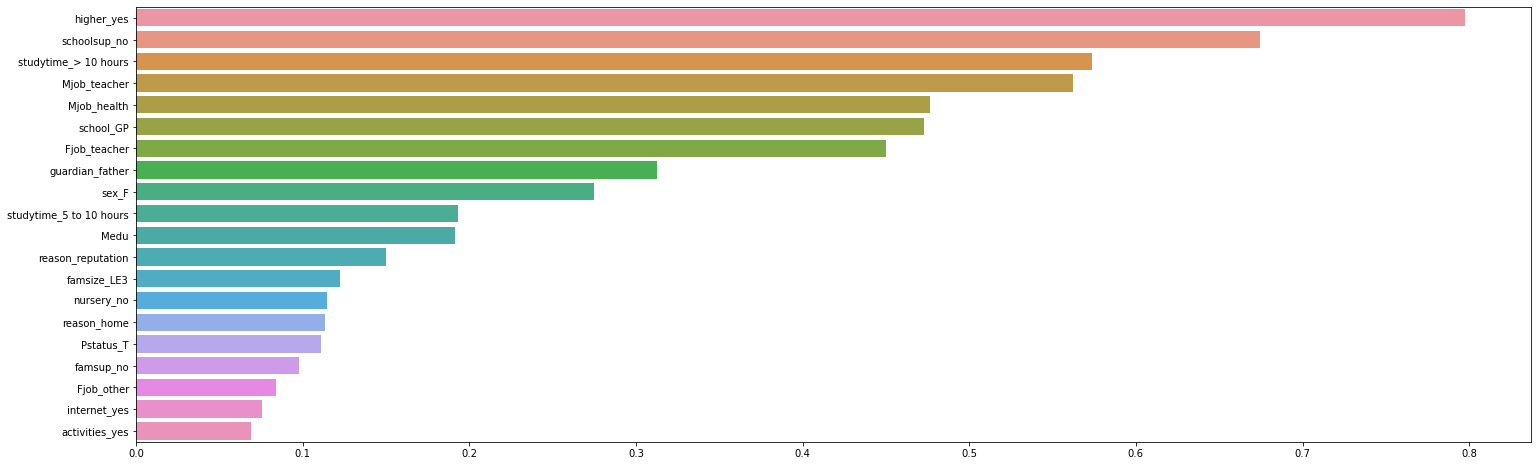

In [29]:
# Visualizing relationships between features and target
# 1) Willingness to take higher education is the strongest feature, which makes sense in terms of motivation of studying
# Other features such as mom's job: teacher, long studytime, educated mom makes sense 

# 2) However, some features didn't make sense, so trying to compare and conduct null hypothesis testing to see what is happening 
# No extra educational support leads to good grade doesn't make sense
# -> maybe due to low data, outliers might distorted the result

# School_GP is a positive factor to get a good grade
# -> Why? Is School_GP better school? 

ridge_reg = Ridge(alpha=1)
ridge_reg.fit(X_train, y_train)

plt.figure(figsize=(25,8))
coef = pd.Series(ridge_reg.coef_, index=X_train.columns)
coef_sort = coef.sort_values(ascending=False)[:20]
sns.barplot(x=coef_sort.values, y=coef_sort.index)

In [30]:
# Is this factor(No extra educational support) statistically significant?
# Comparing G1 scores for schoolsup = yes vs schoolsup = no
np.mean(student_por[student_por['schoolsup'] == 'no']['G1']), np.mean(student_por[student_por['schoolsup'] == 'yes']['G1'])

(11.46643717728055, 10.823529411764707)

In [31]:
# first line - G1, G2, G3 : [0, 11, 11] looks really odd 
student_por.sort_values(by='G1')[:10]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2 to 5 hours,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
567,MS,M,18,R,GT3,T,3,2,services,other,course,mother,1,< 2 hours,1,no,no,no,no,yes,no,yes,no,2,3,1,2,2,5,0,4,0,0
569,MS,M,18,U,GT3,T,3,3,at_home,at_home,course,mother,1,2 to 5 hours,2,no,yes,no,yes,yes,no,yes,no,4,4,5,1,3,3,9,4,8,8
523,MS,M,18,U,LE3,T,4,4,at_home,health,home,mother,1,> 10 hours,0,no,yes,no,yes,yes,no,yes,yes,5,5,5,5,5,5,2,5,6,6
603,MS,F,18,R,LE3,A,4,2,teacher,other,reputation,mother,1,2 to 5 hours,0,no,no,no,yes,yes,yes,yes,yes,5,3,1,1,1,5,0,5,0,0
605,MS,F,19,U,GT3,T,1,1,at_home,services,other,father,2,< 2 hours,1,no,no,no,no,yes,no,no,no,5,5,5,2,3,2,0,5,0,0
572,MS,F,16,U,GT3,A,3,2,services,at_home,course,mother,2,2 to 5 hours,2,no,yes,no,yes,yes,yes,no,yes,2,5,5,1,1,1,8,5,5,7
639,MS,M,19,R,GT3,T,1,1,other,services,other,mother,2,< 2 hours,1,no,no,no,no,yes,yes,no,no,4,3,2,1,3,5,0,5,8,0
568,MS,M,19,U,GT3,T,3,2,at_home,services,course,mother,2,< 2 hours,3,no,no,no,yes,yes,yes,no,no,3,2,1,1,1,3,4,6,11,9
436,MS,F,15,R,LE3,T,1,1,other,services,course,mother,2,< 2 hours,1,no,yes,no,no,yes,yes,yes,yes,4,4,3,1,2,2,4,6,7,8


In [32]:
# Conducting U test
extra_no = student_por[student_por['schoolsup'] == 'no']['G1']
extra_yes = student_por[student_por['schoolsup'] == 'yes']['G1']

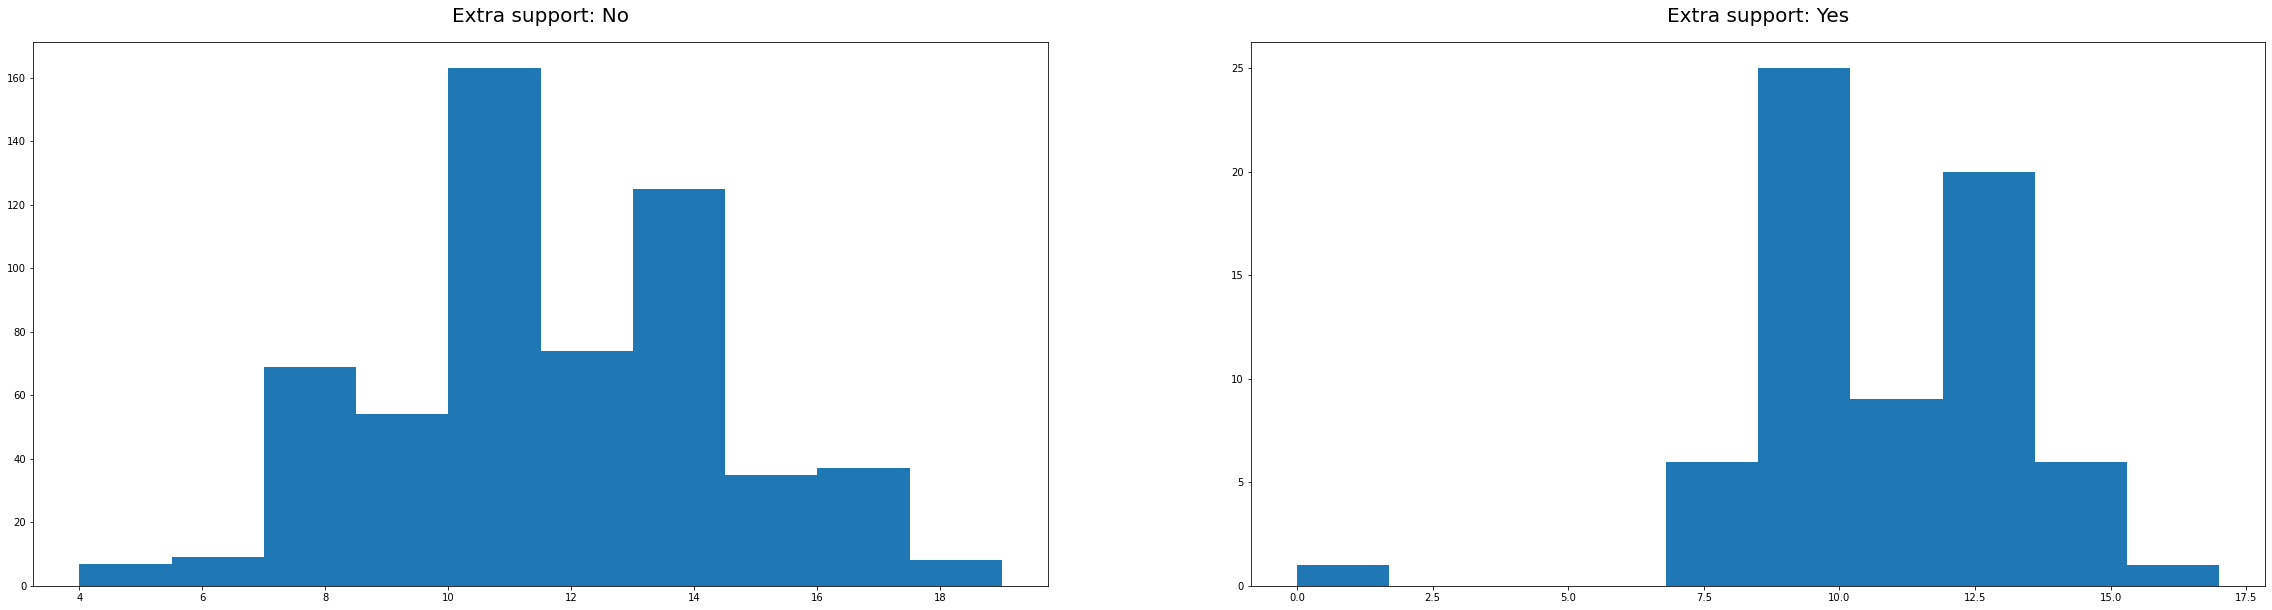

In [33]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(40,10))

ax[0].set_title('Extra support: No', pad=20, fontdict = {'fontsize': 20})
ax[1].set_title('Extra support: Yes', pad=20, fontdict = {'fontsize': 20})

ax[0].hist(extra_no)
ax[1].hist(extra_yes)
plt.show()

In [34]:
# Null Hypothesis testing: students grades have no difference given extra support
# Less than 0.05, so reject null hypothesis that student grades have no difference given extra support 

# We can conclude that extra support has an effect but if is surprising to see that having no extra support actually helps more

u1, p1 = stats.mannwhitneyu(extra_no, extra_yes)
u1, p1

(22164.0, 0.09747134927918116)

- School GP vs MS

In [35]:
# Is this factor(School difference) statistically significant?
# Comparing G1 scores for schoolsup = yes vs schoolsup = no
np.mean(student_por[student_por['school'] == 'GP']['G1']), np.mean(student_por[student_por['school'] == 'MS']['G1'])

(11.98581560283688, 10.300884955752212)

In [36]:
# Conducting u-test (if we assume that those are samples)
school_gp = student_por[student_por['school'] == 'GP']['G1']
school_ms = student_por[student_por['school'] == 'MS']['G1']

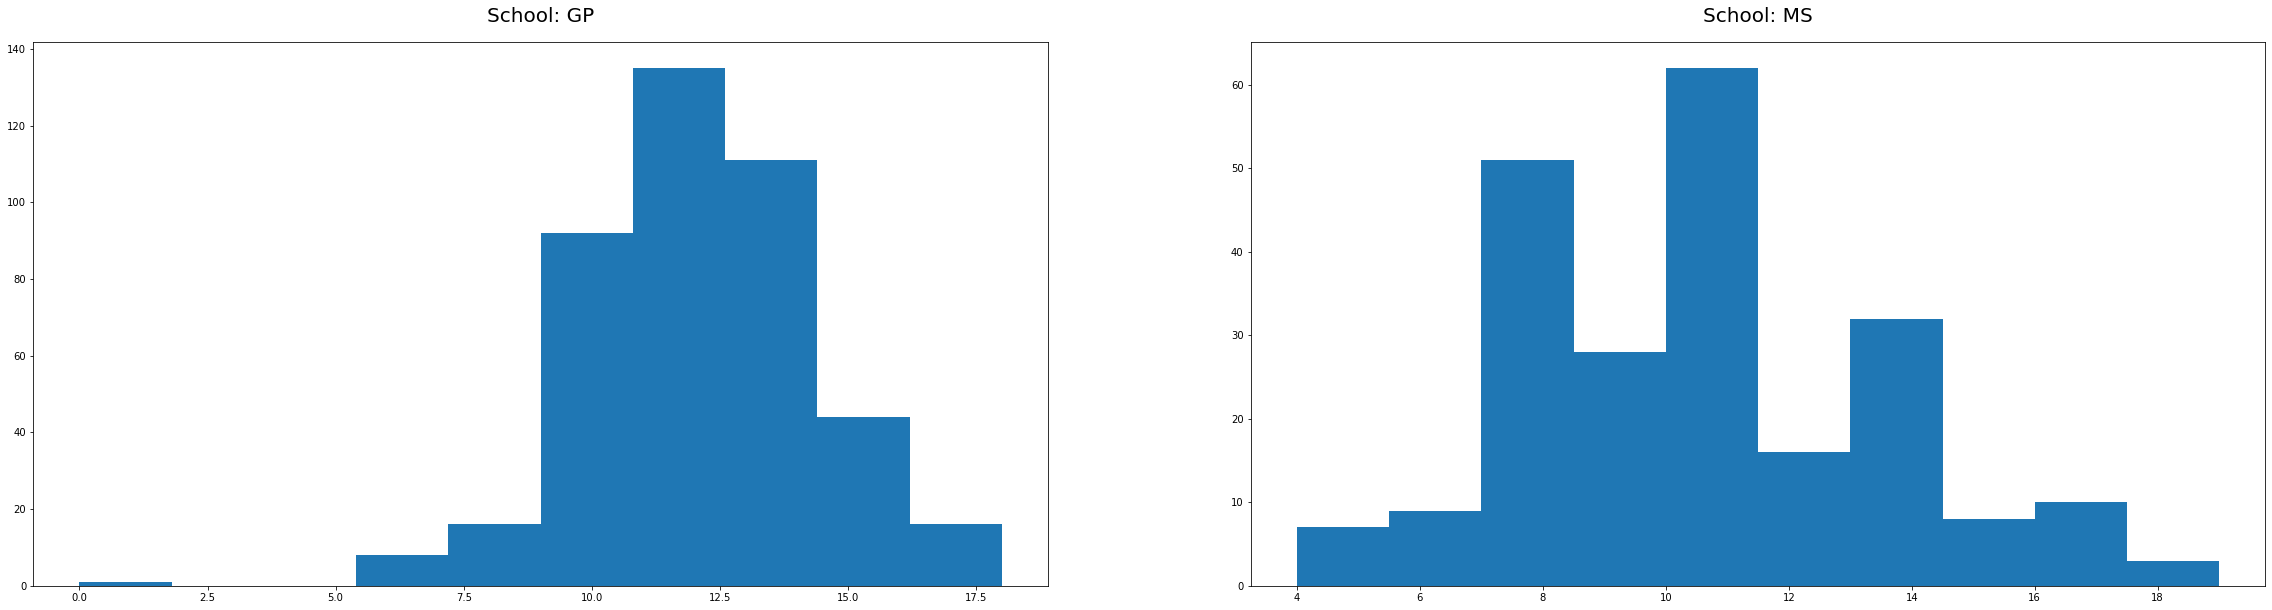

In [37]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(40,10))

ax[0].set_title('School: GP', pad=20, fontdict = {'fontsize': 20})
ax[1].set_title('School: MS', pad=20, fontdict = {'fontsize': 20})

ax[0].hist(school_gp)
ax[1].hist(school_ms)
plt.show()

In [38]:
# Null Hypothesis testing: students grades have no difference given different school
# Less than 0.05, so reject null hypothesis that there are no difference
# We can also know this by distribution above, but why?

u2, p2 = stats.mannwhitneyu(school_gp, school_ms)
u2, p2

(65201.0, 1.4239582478483665e-14)

## What makes School GP different from School MS in terms of grade?

- In this question, I will create decision tree classifier to see what makes two schools different in terms of grade

In [39]:
# recalling dataset 
student_por_v2 =  pd.read_csv('./student-por.csv')

In [40]:
# In terms of target value, it should be binomial (0 or 1)
# Assumption: movie ratings can be classified as Good rating(1, rating >= 2.0) or Bad rating(0, rating < 2.0)
# Create a function that changes movie ratings into Good/bad rating

def school_binomial(school):
    
    if school == 'GP' : school = 1
    else: school = 0       
        
    return school

student_por_v2['school'] = student_por_v2['school'].apply(lambda x: school_binomial(x))

In [41]:
student_por_v2

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,1,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,1,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,1,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,1,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,0,F,19,R,GT3,T,2,3,services,other,course,mother,1,3,1,no,no,no,yes,no,yes,yes,no,5,4,2,1,2,5,4,10,11,10
645,0,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,3,4,1,1,1,4,15,15,16
646,0,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,6,11,12,9
647,0,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,6,10,10,10


In [42]:
# dividing numerical columns / categorical columns
# for categorical columns, conduct one-hot encoding by using get_dummies function 
num_col = student_por_v2.describe().columns
cat_col = student_por_v2.columns.drop(num_col)

student_por_v2_encoded = pd.get_dummies(student_por_v2, columns=cat_col, prefix=cat_col)

In [43]:
student_por_v2_encoded

,school,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,1,18,4,4,2,2,0,4,3,4,1,1,3,4,0,11,11,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0
1,1,17,1,1,1,2,0,5,3,3,1,1,3,2,9,11,11,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0
2,1,15,1,1,1,2,0,4,3,2,2,3,3,6,12,13,12,1,0,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,0,1,1,0
3,1,15,4,2,1,3,0,3,2,2,1,1,5,0,14,14,14,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1
4,1,16,3,3,1,2,0,4,3,2,1,2,5,0,11,13,13,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,1,0,0,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,0,19,2,3,1,3,1,5,4,2,1,2,5,4,10,11,10,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,1,0
645,0,18,3,1,1,2,0,4,3,4,1,1,1,4,15,15,16,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,1,1,0
646,0,18,1,1,2,2,0,1,1,1,1,1,5,6,11,12,9,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,1,0,1,0
647,0,17,3,1,2,1,0,2,4,5,3,4,2,6,10,10,10,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0


In [44]:
# Decision Tree classifier: Easy to interpret, and to figure out what features makes the most importance 

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

y_target = student_por_v2_encoded['school']
X_features = student_por_v2_encoded.drop(['G1', 'G2', 'G3', 'school'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0)

dt_clf = DecisionTreeClassifier(random_state=0)
dt_clf.fit(X_train , y_train)
dt_clf_pred = dt_clf.predict(X_test)
dt_clf_pred_proba = dt_clf.predict_proba(X_test)[:, 1]

In [45]:
# evaluation function

def get_clf_eval(y_test, pred=None, pred_proba=None):
    accuracy = accuracy_score(y_test , pred)
    roc_auc = roc_auc_score(y_test, pred_proba)

    
    print('accuracy: {:.4f}, auc: {:.4f}'.format(accuracy, roc_auc))

In [46]:
get_clf_eval(y_test, dt_clf_pred, dt_clf_pred_proba)

accuracy: 0.6821, auc: 0.6440


In [47]:
# logistic regression(second trial) - adding hyper parameter tuning: 0.8254 as auc score
# Hyper parameter tuning: GridSearchCV
# Retrain by best hyper parameter

from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [8 ,12, 16 ,20], 
    'min_samples_split' : [16,24],
}

# By setting refit=True, this model retrains with the best parameter
grid_dt = GridSearchCV(dt_clf, param_grid=params, scoring='roc_auc', cv=5, refit=True)
grid_dt.fit(X_train, y_train)

print('Best hyper parameter:{0}, Best score:{1:.3f}'.format(grid_dt.best_params_, grid_dt.best_score_))

Best hyper parameter:{'max_depth': 12, 'min_samples_split': 16}, Best score:0.701


In [48]:
# hyper parameter tuning by using grid search cv
best_df_clf = grid_dt.best_estimator_

pred = best_df_clf.predict(X_test)
pred_proba = best_df_clf.predict_proba(X_test)[:, 1]


get_clf_eval(y_test, pred, pred_proba)

accuracy: 0.7026, auc: 0.7159


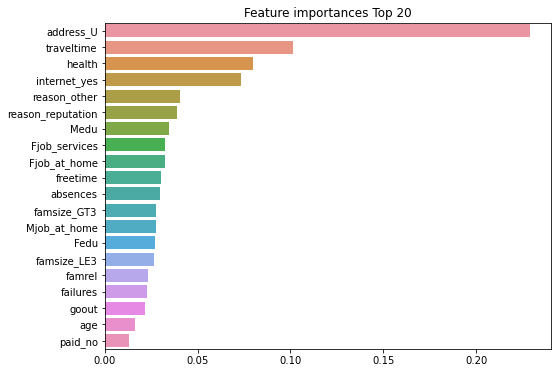

In [49]:
# Sort by feature importance and visualize the result
# It seems that 'Address: Urban' is the most important feature  
ftr_importances_values = best_df_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns  )

ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

In [50]:
# We can also see this in address distribution
# Showing 81.56% in school GP and 47.35% in school MS 
student_por_v2[student_por_v2['school'] == 1]['address'].value_counts()

U    345
R     78
Name: address, dtype: int64

In [51]:
student_por_v2[student_por_v2['school'] == 0]['address'].value_counts()

R    119
U    107
Name: address, dtype: int64

In [52]:
len(student_por_v2[student_por_v2['school'] == 1][student_por_v2['address'] == 'U']) / len(student_por_v2[student_por_v2['school'] == 1]) * 100

81.56028368794325

In [53]:
len(student_por_v2[student_por_v2['school'] == 0][student_por_v2['address'] == 'U']) / len(student_por_v2[student_por_v2['school'] == 0]) * 100

47.34513274336283